<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/Paul_selfstudy12_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv

--2019-04-17 08:18:07--  https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘customer_churn.csv’

customer_churn.csv  100%[===================>] 668.81K  --.-KB/s    in 0.05s   

2019-04-17 08:18:07 (12.3 MB/s) - ‘customer_churn.csv’ saved [684858/684858]



In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("customer_churn.csv")

In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [0]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
df['Exited'].unique()

array([1, 0])

In [0]:
from fastai.tabular import *

In [0]:
dep_var = 'Exited'

In [0]:
cont_names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [0]:
cat_names = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [0]:
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[8000:9999].copy(), cat_names=cat_names, cont_names=cont_names)

In [0]:
test

In [0]:
data = (TabularList.from_df(df.iloc[0:8000].copy(), cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.33)
                           .label_from_df(cols=dep_var)
                           .databunch())

In [0]:
data.show_batch(rows=10)

Geography,Gender,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,target
Germany,Female,1,0,-0.1501,1.5612,-1.3838,0.7335,-0.8974,-0.3314,1
France,Female,1,0,-0.2425,0.5985,1.0209,-1.2614,0.8144,1.6220,0
France,Male,0,0,1.9763,-2.0007,-1.0402,1.3415,-0.8974,0.7889,0
Germany,Male,1,1,-1.4033,0.5985,0.6774,0.6945,2.5262,-1.0634,1
Germany,Male,1,0,-1.5369,-0.5567,-0.0097,1.5629,0.8144,-1.1673,0
France,Female,1,1,0.6203,-0.5567,0.3338,-1.2614,0.8144,1.5661,0
France,Female,1,1,-0.9822,0.7910,-1.0402,1.0009,-0.8974,-0.8705,0
France,Male,1,1,0.2813,-0.9418,-0.6967,-1.2614,0.8144,-0.6396,0
France,Female,0,0,-0.7356,-1.5194,-0.0097,0.5807,0.8144,1.6626,0
France,Male,1,0,1.4318,-0.4604,0.6774,-1.2614,0.8144,-0.0656,0


In [0]:
data.train_ds.cont_names

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [0]:
data.train_ds.cat_names

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [0]:
learn = tabular_learner(data, layers=[10,5], metrics=[accuracy,Precision(), Recall()])
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.425220,0.342434,0.865909,0.780000,0.448276,00:01


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.374104,0.339762,0.865152,0.788194,0.434866,00:00
1,0.368647,0.336177,0.864773,0.831325,0.396552,00:00
2,0.361968,0.336339,0.867045,0.815498,0.423372,00:01
3,0.365472,0.329617,0.866667,0.748538,0.490421,00:01
4,0.356019,0.330140,0.863636,0.757962,0.455939,00:01
5,0.355384,0.328281,0.864394,0.736994,0.488506,00:01
6,0.353565,0.328184,0.864394,0.727778,0.501916,00:01
7,0.348812,0.325296,0.869318,0.767372,0.486590,00:01
8,0.338379,0.325361,0.865152,0.726776,0.509579,00:01
9,0.341325,0.324641,0.867424,0.754438,0.488506,00:01


In [0]:
learn.get_preds(test)

[tensor([[0.5722, 0.4278],
         [0.9049, 0.0951],
         [0.0222, 0.9778],
         ...,
         [0.9475, 0.0525],
         [0.9406, 0.0594],
         [0.8740, 0.1260]]), tensor([1, 0, 1,  ..., 0, 0, 0])]

In [0]:
preds,y = learn.get_preds(test)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.data

TabularDataBunch;

Train: LabelList (5360 items)
x: TabularList
Geography France; Gender Female; HasCrCard 1; IsActiveMember 1; CreditScore -0.3282; Age 0.2886; Tenure -1.0295; Balance -1.2432; NumOfProducts -0.9047; EstimatedSalary 0.0276; ,Geography France; Gender Male; HasCrCard 1; IsActiveMember 1; CreditScore 1.7773; Age 1.0564; Tenure 0.6957; Balance -1.2432; NumOfProducts 0.8094; EstimatedSalary -1.5552; ,Geography Germany; Gender Female; HasCrCard 1; IsActiveMember 0; CreditScore -2.8486; Age -0.9591; Tenure -0.3394; Balance 0.5983; NumOfProducts 4.2377; EstimatedSalary 0.3396; ,Geography France; Gender Male; HasCrCard 0; IsActiveMember 1; CreditScore -1.5521; Age 0.4805; Tenure -0.3394; Balance 1.0306; NumOfProducts 0.8094; EstimatedSalary -0.4303; ,Geography France; Gender Male; HasCrCard 1; IsActiveMember 1; CreditScore 0.3460; Age -1.1511; Tenure -1.0295; Balance 0.9114; NumOfProducts -0.9047; EstimatedSalary -0.4861; 
y: CategoryList
1,0,1,0,0
Path: .;

Valid: LabelList (2

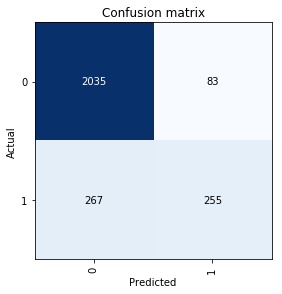

In [0]:
interp.plot_confusion_matrix()